In [ ]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

# Importing the dataset
dataset = pd.read_csv('/content/sample_data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
# X= dataset.iloc[:,:].values

In [ ]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.shape

(200, 5)

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

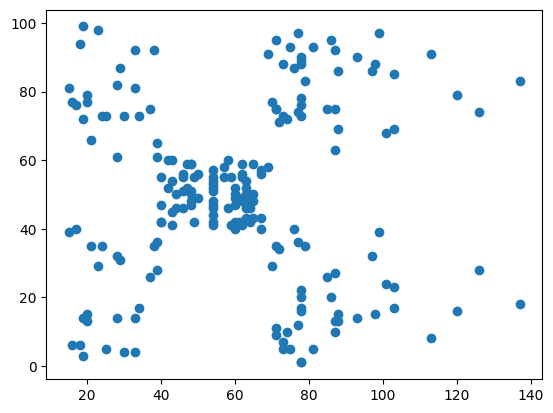

In [ ]:
a = dataset.iloc[:, [3]].values
b = dataset.iloc[:, [4]].values
plt.scatter(a,b)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

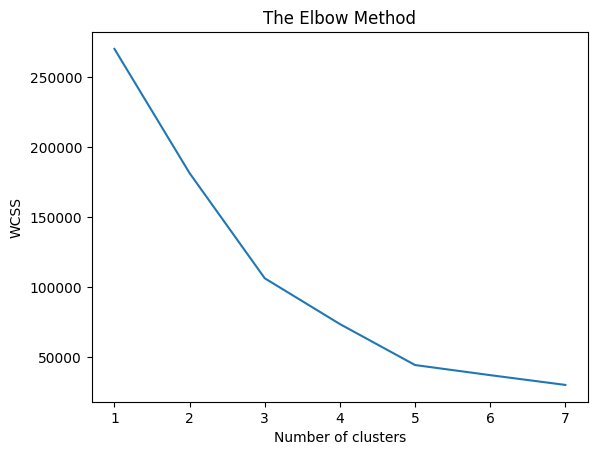

In [ ]:
#Block2
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
#Initializes an empty list wcss that will store the within-cluster sum of squares (WCSS) for different numbers of clusters.

#kmeans parameters n_cluster is the number of clusters,
#init can be random, as we dont want ramdom we will use k-means++
#Determines random number generation for centroid initialization.
#Use an int to make the randomness deterministic

#This loop will run from 1 to 7 (inclusive). For each iteration, it will create a KMeans clustering model with i clusters and compute the WCSS.

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)

# Here, a KMeans object is instantiated with the following parameters:

# n_clusters=i: Specifies the number of clusters.
# init='k-means++': This initializes the centroids in a smart way to speed up convergence. It's an improvement over the classic method of initializing centroids randomly.
# random_state=42: Ensures reproducibility by using a fixed seed for the random number generator.
#Kmeans has a artibute called intertia to calculate Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# # This section of the code plots the WCSS values for different numbers of clusters. The idea behind the "elbow method"
# is to choose the number of clusters where the WCSS starts to level off (like an "elbow" in the curve).
# This often indicates a good balance between precision and computational cost.

# # In summary, this code is used to determine the optimal number of clusters for the KMeans algorithm
# by plotting the within-cluster sum of squares (WCSS) for a range of cluster numbers and visually identifying
# the "elbow" in the curve.

In [ ]:
#Block 3
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#Here, a KMeans clustering model is being instantiated. The parameters are as follows:

# n_clusters=5: This specifies that the model should create 5 clusters.
# The number 5 might have been chosen based on insights from the previous code block (the elbow method) or
# other external knowledge.
# init='k-means++': This is an initialization method for the centroids. The 'k-means++' method is an improved
# way of setting the initial positions of the centroids to speed up the convergence of the algorithm, as opposed
# to randomly initializing them.
# random_state=42: This sets a seed for the random number generator, ensuring that the results are reproducible.
# If you run the algorithm multiple times with this same random state, you'll get the same results each time.


y_kmeans = kmeans.fit_predict(X)


# This line does two things:

# Fitting: The model is trained on the dataset X. This means the algorithm will run through the dataset and
# find 5 clusters based on the patterns in the data.

# Predicting: After fitting, the same dataset X is passed through the model to assign each data point to one of the
# 5 clusters. The fit_predict method is a combination of fit and predict methods, and it returns the cluster
# assignments for each data point in X.

# The cluster assignments (i.e., which of the 5 clusters each data point belongs to) are stored in the y_kmeans variable.

# In summary, this block of code applies the KMeans clustering algorithm to the dataset

# X to group the data into 5 clusters and stores the cluster assignments in the y_kmeans variable.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

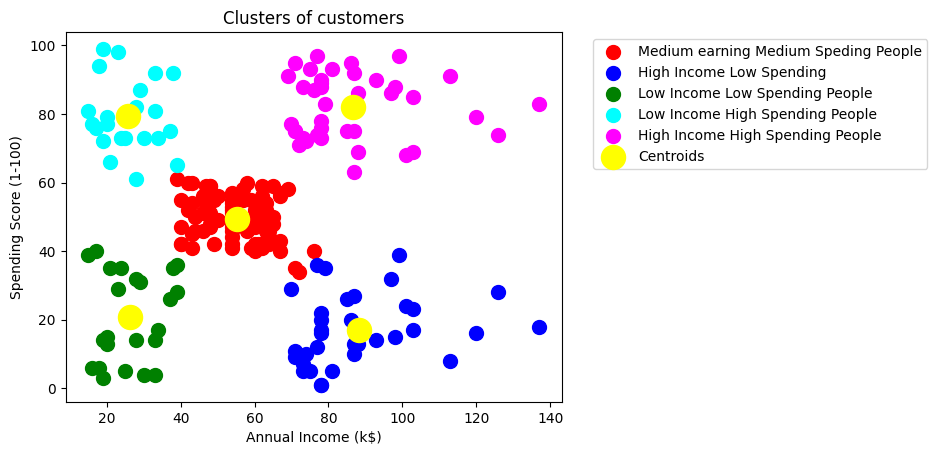

In [ ]:
#Block 4
# Visualising the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium earning Medium Speding People')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income Low Spending')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income Low Spending People')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income High Spending People')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income High Spending People')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

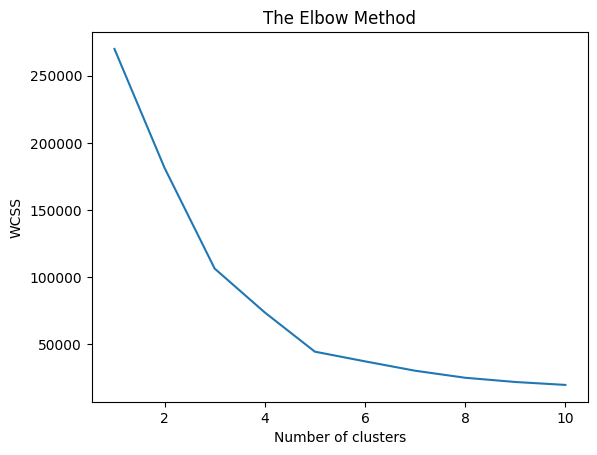

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        3  
2        2  
3        3  
4        2  


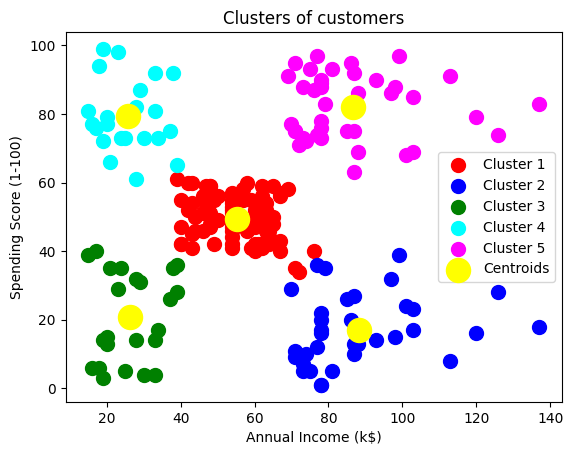

In [ ]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/sample_data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
# y = dataset.iloc[:, 3].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
dataset['Cluster'] = y_kmeans

# Display the data with cluster labels
print(dataset.head())

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
# Since the actual CSV file with the data isn't available in the environment, I'll use the image data as a placeholder.
# However, normally you would read the CSV file with pandas as done in the provided code.

# Let's create a mock dataset with customer IDs and cluster assignments to demonstrate how you can get the customer numbers
# and cluster IDs in a list.

# Mock dataset (in practice, you would have the actual dataset from the CSV file)
customer_ids = range(1, 201)  # Customer IDs from 1 to 200
cluster_assignments = [i % 5 for i in range(200)]  # Mock cluster assignments (0 to 4)

# Combine the customer IDs with their cluster assignments
customers_clusters = list(zip(customer_ids, cluster_assignments))

# Display the first few entries to verify
customers_clusters[:200]


[(1, 0),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 4),
 (6, 0),
 (7, 1),
 (8, 2),
 (9, 3),
 (10, 4),
 (11, 0),
 (12, 1),
 (13, 2),
 (14, 3),
 (15, 4),
 (16, 0),
 (17, 1),
 (18, 2),
 (19, 3),
 (20, 4),
 (21, 0),
 (22, 1),
 (23, 2),
 (24, 3),
 (25, 4),
 (26, 0),
 (27, 1),
 (28, 2),
 (29, 3),
 (30, 4),
 (31, 0),
 (32, 1),
 (33, 2),
 (34, 3),
 (35, 4),
 (36, 0),
 (37, 1),
 (38, 2),
 (39, 3),
 (40, 4),
 (41, 0),
 (42, 1),
 (43, 2),
 (44, 3),
 (45, 4),
 (46, 0),
 (47, 1),
 (48, 2),
 (49, 3),
 (50, 4),
 (51, 0),
 (52, 1),
 (53, 2),
 (54, 3),
 (55, 4),
 (56, 0),
 (57, 1),
 (58, 2),
 (59, 3),
 (60, 4),
 (61, 0),
 (62, 1),
 (63, 2),
 (64, 3),
 (65, 4),
 (66, 0),
 (67, 1),
 (68, 2),
 (69, 3),
 (70, 4),
 (71, 0),
 (72, 1),
 (73, 2),
 (74, 3),
 (75, 4),
 (76, 0),
 (77, 1),
 (78, 2),
 (79, 3),
 (80, 4),
 (81, 0),
 (82, 1),
 (83, 2),
 (84, 3),
 (85, 4),
 (86, 0),
 (87, 1),
 (88, 2),
 (89, 3),
 (90, 4),
 (91, 0),
 (92, 1),
 (93, 2),
 (94, 3),
 (95, 4),
 (96, 0),
 (97, 1),
 (98, 2),
 (99, 3),
 (100, 4),
 (101, 0

Here's what each part does:

X[y_kmeans == 0, 0]: This is used to get the x-coordinates of all the data points that belong to cluster 0. Here's a step-by-step breakdown:

y_kmeans == 0: This is a Boolean array where each element is True if the corresponding data point belongs to cluster 0, and False otherwise.


X[y_kmeans == 0, 0]: This uses the Boolean array to index into the X array and get the x-coordinate (because of the , 0) of all the data points that belong to cluster 0.


X[y_kmeans == 0, 1]: Similarly, this is used to get the y-coordinates of all the data points that belong to cluster 0. The only difference is the , 1 at the end, which means we're getting the second column of the X array, i.e., the y-coordinates.



s = 100: This sets the size of the scatter plot markers to 100.

c = 'red': This sets the color of the scatter plot markers for this cluster to red.

label = 'Cluster 1': This sets the label for this set of points, which will be used in the legend.

The same logic is applied for the other clusters (Cluster 2, Cluster 3, etc.) with different colors and labels.

Finally, the line:

python
Copy code
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
is used to plot the centroids of the clusters. The kmeans.cluster_centers_ attribute contains the x and y coordinates of the centroids of the clusters. The [:, 0] notation is used to get all the x-coordinates




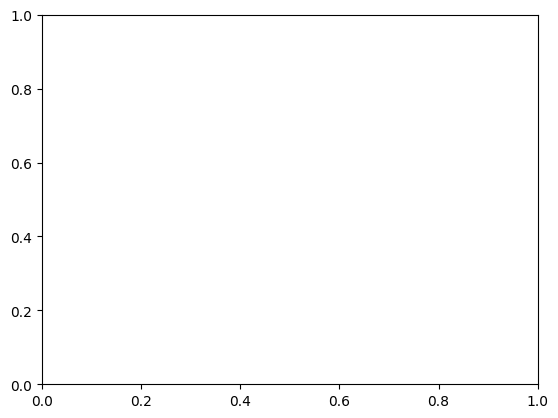

In [ ]:
# Assuming y_kmeans is your clustering result and X is your dataset

# Block 5
# Annotate each data point in the scatter plot with the customer's ID
for i, txt in enumerate(dataset.CustomerID):
    plt.annotate(txt, (X[i, 0], X[i, 1]))


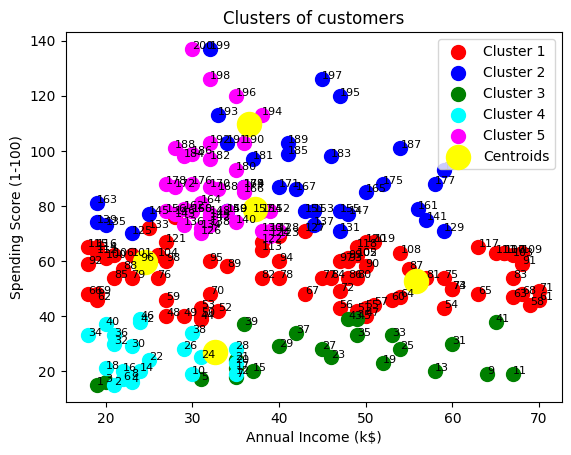

In [ ]:
# Block 4
# Visualising the clusters with annotations
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# Annotating each point with the customer's ID
for i, txt in enumerate(dataset.CustomerID):
    plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=8)

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


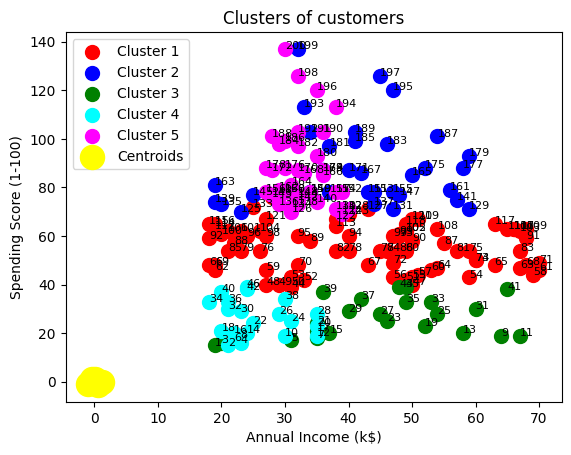

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


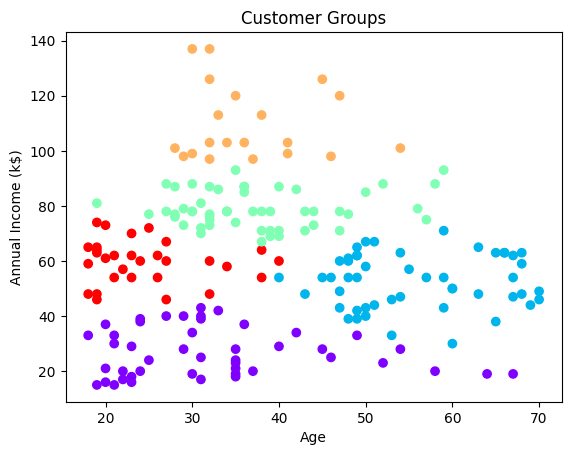

In [ ]:
# Block 4
# Visualising the clusters with annotations
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# Annotating each point with the customer's ID
for i, txt in enumerate(dataset.CustomerID):
    plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=8)

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
# Here is some Python code to analyze the customer data for clustering and present a visualization:

# ```python
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# Select the input features for clustering - Age and Annual Income
X = df[['Age', 'Annual Income (k$)']].values

# Apply KMeans to cluster the data into 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Visualize the clustered data with a scatter plot
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Groups')
plt.show()
# ```

# This loads the customer data, selects the Age and Annual Income features to use for clustering, applies K-Means to cluster the data into 5 clusters, assigns the cluster labels back to the original DataFrame, and then visualizes the clustered data with a scatter plot colored by cluster label.

# Some further analysis could include:
# - Evaluating the optimal number of clusters using the elbow method
# - Profiling the customers in each cluster by their other attributes like Gender and Spending Score
# - Interpreting what each customer cluster represents in terms of segmentation

# Let me know if you would like any clarification or have additional questions!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

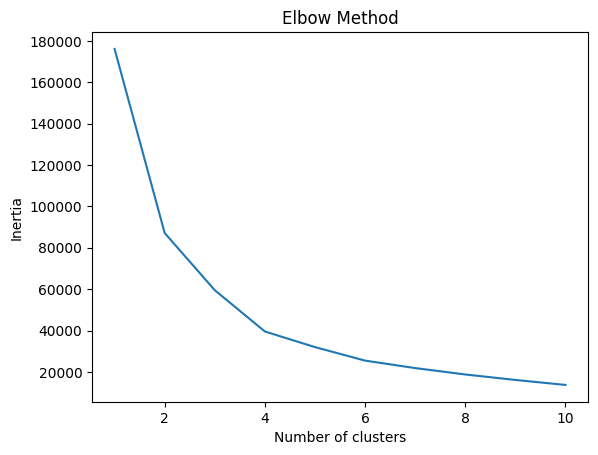

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

X = df[['Age', 'Annual Income (k$)']].values

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# import numpy as np

# Load the data
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# Select the feature and target
X = df[['Annual Income (k$)']]
y = df['Spending Score (1-100)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

RMSE: 25.001328131557386
R-squared: -0.046282659744804056


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


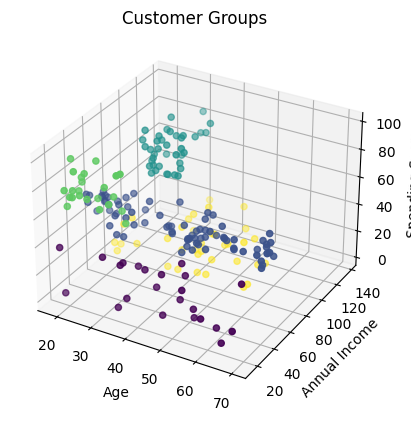

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")

# Cluster data into 5 clusters
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Plot clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=kmeans.labels_.astype(float), cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Groups')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


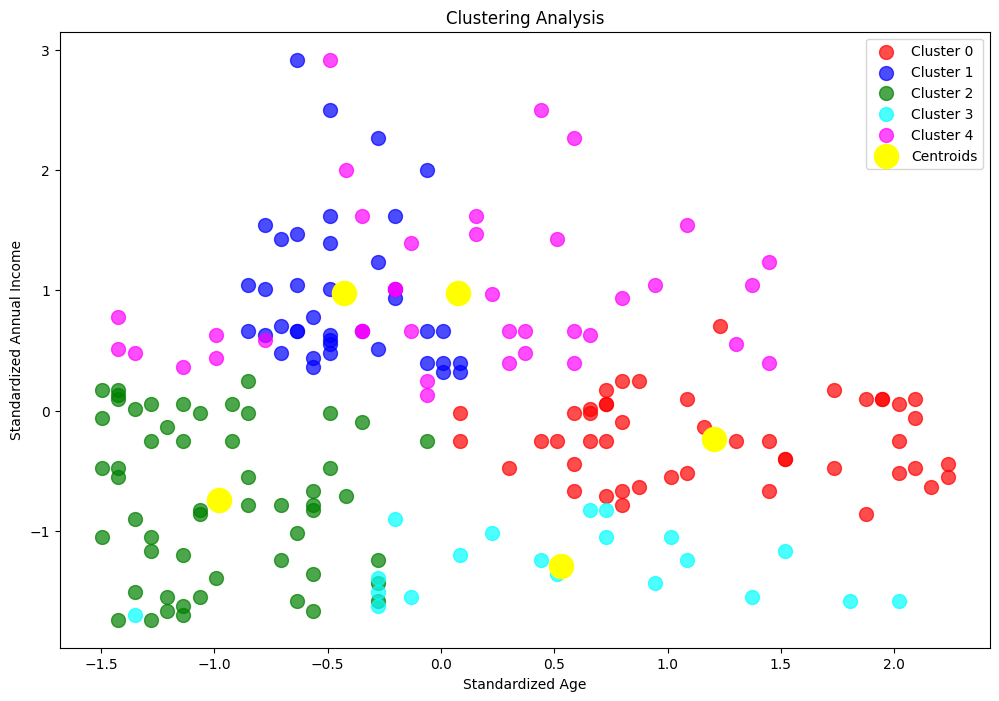

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data into a DataFrame
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# Select the features for clustering (Age, Annual Income, Spending Score)
X = data.iloc[:, [2, 3, 4]].values

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for Cluster 0
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=100, c='red', label='Cluster 0', alpha=0.7)

# Scatter plot for Cluster 1
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=100, c='blue', label='Cluster 1', alpha=0.7)

# Scatter plot for Cluster 2
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], s=100, c='green', label='Cluster 2', alpha=0.7)

# Scatter plot for Cluster 3
plt.scatter(X_scaled[clusters == 3, 0], X_scaled[clusters == 3, 1], s=100, c='cyan', label='Cluster 3', alpha=0.7)

# Scatter plot for Cluster 4
plt.scatter(X_scaled[clusters == 4, 0], X_scaled[clusters == 4, 1], s=100, c='magenta', label='Cluster 4', alpha=0.7)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clustering Analysis')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Annual Income')
plt.legend()
plt.show()
